# Data Preparation:

During this process of preparing the data, I looked at 11 dataframes and decided that three of the dataframes provided the most pertinent information to determine what factors must be considered when starting a production company. In the first dataframe(df1), there few NaN values in the studio and domestic gross columns, but 1350 NaN values in the foreign gross column. I decided to drop all the NaN values in each column, while also changing the datatype of the foreign gross column to int. As a result, I was able to aggregate the data of each column and conduct a comparative analysis. 
   
   The second dataframe(df2) did not have any NaN or missing values in the columns I focused on: release dates, production budgets, domestic gross and worldwide gross. However, there were missing data in each domestic and worldwide gross columns, with a lot of zero values, which could change the findings of my analysis if those values were retrieved. Nevertheless, those values did not affect my ability to perform a comparative analysis. I aggregated data columns of release dates and domestic and worldwide gross, focusing specifically on the revenue gross of each month.
    
   In the third dataframe(df3), I focused on the genre and box office columns. While there were few NaN values in the genre column, there were many NaN values in the box office column. As in the previous dataframes, these missing values could change my findings if these values were retrieved. Also, there was no specification as to what type of revenue was included in the box office column. Nevertheless, I dropped the NaN values in each column, and reassigned variables in genres based on the most number of films in a genre. As a result, This allowed me to analyze what genres generated the most revenue.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('bom.movie_gross.csv.gz')

In [5]:
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
df.columns[1]

'studio'

In [7]:
df.sort_values('domestic_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [10]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [11]:
df.shape

(3387, 5)

In [12]:
df.index

RangeIndex(start=0, stop=3387, step=1)

In [13]:
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [14]:
df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [15]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
df['domestic_gross'].median()

1400000.0

In [17]:
df['domestic_gross'].isna().sum()

28

In [18]:
df['domestic_gross'].value_counts()

1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64

In [19]:
df['foreign_gross'].unique()

array(['652000000', '691300000', '664300000', ..., '530000', '256000',
       '30000'], dtype=object)

In [20]:
df['foreign_gross'].value_counts()

1200000      23
1100000      14
1900000      12
4200000      12
2500000      11
             ..
207200000     1
274400000     1
208000        1
384800000     1
275400000     1
Name: foreign_gross, Length: 1204, dtype: int64

In [19]:
df['foreign_gross'].isna().sum()

1350

In [20]:
df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [21]:
df.loc[:3, 'foreign_gross']

0    652000000
1    691300000
2    664300000
3    535700000
Name: foreign_gross, dtype: object

In [22]:
df.loc[:3, 'foreign_gross'].astype(int)

0    652000000
1    691300000
2    664300000
3    535700000
Name: foreign_gross, dtype: int64

In [23]:
df.loc[:3, 'foreign_gross'].map(int)

0    652000000
1    691300000
2    664300000
3    535700000
Name: foreign_gross, dtype: int64

In [24]:
df['foreign_gross'].fillna(1200000)

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382      1200000
3383      1200000
3384      1200000
3385      1200000
3386      1200000
Name: foreign_gross, Length: 3387, dtype: object

In [25]:
df['foreign_gross'].dtype

dtype('O')

In [33]:
df.iloc[1872]

title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                       9.367e+08
foreign_gross                          1,131.6
year                                      2015
Name: 1872, dtype: object

In [26]:
df['title'].unique

<bound method Series.unique of 0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object>

In [27]:
df['domestic_gross'].unique()

array([4.150e+08, 3.342e+08, 2.960e+08, ..., 2.070e+04, 1.290e+04,
       2.400e+03])

In [28]:
df_gross = df[['domestic_gross', 'foreign_gross']]
df_gross

,domestic_gross,foreign_gross
0,415000000.0,652000000
1,334200000.0,691300000
2,296000000.0,664300000
3,292600000.0,535700000
4,238700000.0,513900000
...,...,...
3382,6200.0,NaN
3383,4800.0,NaN
3384,2500.0,NaN
3385,2400.0,NaN


In [29]:
df_gross.sort_values('foreign_gross')

,domestic_gross,foreign_gross
2760,226000000.0,"1,010.0"
1873,652300000.0,"1,019.4"
1872,936700000.0,"1,131.6"
1874,353000000.0,"1,163.0"
3079,678800000.0,"1,369.5"
...,...,...
3382,6200.0,NaN
3383,4800.0,NaN
3384,2500.0,NaN
3385,2400.0,NaN


In [30]:
df2 = pd.read_csv('imdb.title.ratings.csv.gz')

In [31]:
df2

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [33]:
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [34]:
df2.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [35]:
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [36]:
df2.index

RangeIndex(start=0, stop=73856, step=1)

In [37]:
df2.shape

(73856, 3)

In [38]:
df2.isna()

,tconst,averagerating,numvotes
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
73851,False,False,False
73852,False,False,False
73853,False,False,False
73854,False,False,False


In [39]:
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [40]:
df2['averagerating'].median()

6.5

In [41]:
df2['numvotes'].median()

49.0

In [42]:
df2['numvotes'].mean()

3523.6621669194105

In [43]:
df3 = pd.read_csv('tn.movie_budgets.csv.gz')

In [44]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [128]:
df3['release_date'].value_counts()

Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2009    13
                ..
Apr 18, 1986     1
Dec 17, 2003     1
Nov 19, 1982     1
Dec 13, 2011     1
Apr 1, 1986      1
Name: release_date, Length: 2418, dtype: int64

In [130]:
df3.sort_values('release_date', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3712,13,"Sep 9, 2016",Kicks,10000000,150191,150191
3584,85,"Sep 9, 2016",When the Bough Breaks,10000000,29747603,30768449
3129,30,"Sep 9, 2016",The Disappointments Room,15000000,2423467,3503761
3287,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586,42446455
849,50,"Sep 9, 2016",Sully,60000000,125070033,238524556
...,...,...,...,...,...,...
1408,9,"Apr 1, 2005",Sin City,40000000,74103820,158527918
5769,70,"Apr 1, 1996",Bang,10000,527,527
2260,61,"Apr 1, 1988","Bright Lights, Big City",25000000,16118077,16118077
5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000,0,0


In [149]:
df3['CovertedDate'] = pd.to_datetime(df3['release_date'], format='%b_%Y')
df3

KeyError: 'release_date'

In [45]:
budget_gross = df3[['production_budget', 'domestic_gross', 'worldwide_gross']]
budget_gross

,production_budget,domestic_gross,worldwide_gross
0,"$425,000,000","$760,507,625","$2,776,345,279"
1,"$410,600,000","$241,063,875","$1,045,663,875"
2,"$350,000,000","$42,762,350","$149,762,350"
3,"$330,600,000","$459,005,868","$1,403,013,963"
4,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...
5777,"$7,000",$0,$0
5778,"$6,000","$48,482","$240,495"
5779,"$5,000","$1,338","$1,338"
5780,"$1,400",$0,$0


In [46]:
budget_gross.sort_values('production_budget', ascending=False)

,production_budget,domestic_gross,worldwide_gross
406,"$99,000,000","$130,178,411","$250,091,610"
407,"$99,000,000","$105,806,508","$190,325,698"
408,"$99,000,000","$30,824,628","$84,747,441"
5326,"$989,000","$8,158","$8,158"
409,"$98,000,000","$202,007,640","$435,040,395"
...,...,...,...
5242,"$1,000,000","$2,678,010","$3,553,253"
5241,"$1,000,000","$2,981,038","$5,438,911"
5240,"$1,000,000","$3,122,616","$3,324,070"
5239,"$1,000,000","$3,395,581","$3,465,703"


In [47]:
highest_budgets = budget_gross.loc[budget_gross['production_budget'] > 100000000]
highest_budgets

TypeError: '>' not supported between instances of 'str' and 'int'

In [48]:
sns.histplot(data=highest_budgets, x='production_budget');

NameError: name 'highest_budgets' is not defined

In [49]:
df3['domestic_gross'].astype(int)

ValueError: invalid literal for int() with base 10: '$760,507,625'

In [51]:
df3['domestic_gross'] = df3['domestic_gross'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [53]:
df3.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [54]:
df3.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [55]:
df3.shape

(5782, 6)

In [56]:
df3['domestic_gross'].isna().sum()

0

In [57]:
df3['production_budget'].dtype

dtype('O')

In [58]:
df3.loc[:3, 'production_budget']

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
Name: production_budget, dtype: object

In [59]:
df3['worldwide_gross'].isna().sum()

0

In [60]:
df3.loc[:5, 'worldwide_gross']

0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
5    $2,053,311,220
Name: worldwide_gross, dtype: object

In [61]:
df3['worldwide_gross'] = df3['worldwide_gross'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [62]:
df3['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [63]:
df3['worldwide_gross'].astype(int)

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [64]:
df3['production_budget'].isna().sum()

0

In [65]:
df3['production_budget'].dtype

dtype('O')

In [66]:
df3.loc[:5, 'production_budget'] 

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
5    $306,000,000
Name: production_budget, dtype: object

In [67]:
df3['production_budget'] = df3['production_budget'].map(lambda x: x.lstrip('$,').replace(',', ''))

In [68]:
df3['production_budget'] = df3['production_budget'].astype(int)

In [69]:
df3['production_budget'].median()

17000000.0

In [70]:
df3['production_budget'].mean()

31587757.0965064

In [71]:
df3['production_budget'].std()

41812076.82694309

In [72]:
df3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [73]:
df3['worldwide_gross'].describe()

count     5782
unique    5356
top          0
freq       367
Name: worldwide_gross, dtype: object

In [74]:
df3['production_budget'].min()

1100

In [75]:
df3['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [76]:
df3['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
63795655      1
89138076      1
27108272      1
93953653      1
51432423      1
Name: domestic_gross, Length: 5164, dtype: int64

In [134]:
pd.to_datetime(df3['release_date']).head()

0   2009-12-18
1   2011-05-20
2   2019-06-07
3   2015-05-01
4   2017-12-15
Name: release_date, dtype: datetime64[ns]

In [135]:
df3['release_date'].iloc[0]

'Dec 18, 2009'

In [ ]:
df2['month'] = pd.DatetimeIndex(df2['release_date']).month
df2

In [ ]:
df2.groupby('month').mean().head(10)

In [145]:
df3.reset_index()

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",1,Avatar,425000000,760507625,2776345279
1,"May 20, 2011",2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",3,Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,"Dec 31, 2018",78,Red 11,7000,0,0
5778,"Apr 2, 1999",79,Following,6000,48482,240495
5779,"Jul 13, 2005",80,Return to the Land of Wonders,5000,1338,1338
5780,"Sep 29, 2015",81,A Plague So Pleasant,1400,0,0


In [144]:
df3.count(axis='columns').head(30)

release_date
Dec 18, 2009    5
May 20, 2011    5
Jun 7, 2019     5
May 1, 2015     5
Dec 15, 2017    5
Dec 18, 2015    5
Apr 27, 2018    5
May 24, 2007    5
Nov 17, 2017    5
Nov 6, 2015     5
Jul 20, 2012    5
May 25, 2018    5
Jul 2, 2013     5
Mar 9, 2012     5
Nov 24, 2010    5
May 4, 2007     5
May 6, 2016     5
Mar 25, 2016    5
Dec 14, 2012    5
Jul 15, 2009    5
Dec 13, 2013    5
Dec 17, 2014    5
Apr 14, 2017    5
Jun 28, 2006    5
May 26, 2017    5
Nov 14, 2008    5
May 4, 2012     5
Jul 7, 2006     5
Jun 14, 2013    5
May 16, 2008    5
dtype: int64

In [22]:
df4 = pd.read_csv('rt.movie_info.tsv.gz',sep='\t')

In [23]:
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [24]:
df4.dropna(axis=0)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [25]:
genre_box_office = df4[['genre', 'box_office']]
genre_box_office

,genre,box_office
0,Action and Adventure|Classics|Drama,NaN
1,Drama|Science Fiction and Fantasy,"600,000"
2,Drama|Musical and Performing Arts,NaN
3,Drama|Mystery and Suspense,NaN
4,Drama|Romance,NaN
...,...,...
1555,Action and Adventure|Horror|Mystery and Suspense,"33,886,034"
1556,Comedy|Science Fiction and Fantasy,NaN
1557,Classics|Comedy|Drama|Musical and Performing Arts,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,NaN


In [26]:
genre_box_office.dropna()

,genre,box_office
1,Drama|Science Fiction and Fantasy,"600,000"
6,Comedy,"41,032,915"
7,Drama,"224,114"
8,Drama,"134,904"
15,Comedy|Drama|Mystery and Suspense,"1,039,869"
...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,"25,335,935"
1542,Comedy|Drama,"1,416,189"
1545,Horror|Mystery and Suspense,"59,371"
1546,Art House and International|Comedy|Drama,"794,306"


In [27]:
genre_box_office.value_counts()

genre                                                   box_office 
Action and Adventure|Drama                              20,900,803     2
Science Fiction and Fantasy                             190,871,149    1
Classics|Drama                                          12,900,000     1
Art House and International|Drama|Mystery and Suspense  22,099         1
                                                        3,185,193      1
                                                                      ..
Documentary|Special Interest                            1,569,618      1
                                                        104,286        1
                                                        598,103        1
Documentary|Special Interest|Television                 363            1
Action and Adventure                                    1,526,248      1
Length: 339, dtype: int64

In [28]:
genre_box_office.sort_values('box_office', ascending=False)

,genre,box_office
16,Drama,"99,165,609"
1510,Action and Adventure|Comedy|Science Fiction an...,"98,000,000"
207,Action and Adventure|Drama|Western,"976,847"
1469,Animation|Comedy,"97,661,826"
1323,Comedy|Kids and Family,"95,111,012"
...,...,...
1554,Action and Adventure|Comedy|Western,NaN
1556,Comedy|Science Fiction and Fantasy,NaN
1557,Classics|Comedy|Drama|Musical and Performing Arts,NaN
1558,Comedy|Drama|Kids and Family|Sports and Fitness,NaN


TypeError: unsupported operand type(s) for -: 'str' and 'float'

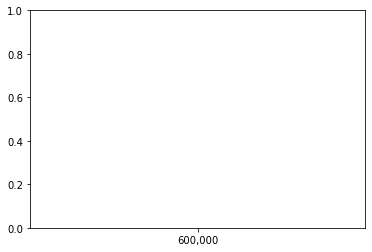

In [83]:
sns.histplot(data=genre_box_office, x='box_office')

In [125]:
highest_grossing_movies = genre_box_office.loc[genre_box_office['box_office'] > 100000000]
highest_grossing_movies

TypeError: '>' not supported between instances of 'str' and 'int'

In [84]:
genre_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       1552 non-null   object
 1   box_office  340 non-null    object
dtypes: object(2)
memory usage: 24.5+ KB


In [85]:
genre_box_office.median()

Series([], dtype: float64)

In [86]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [87]:
df4.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [88]:
df4.shape

(1560, 12)

In [89]:
df4.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [90]:
df4.value_counts()

id    synopsis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [91]:
df4['genre'].value_counts()

Drama                                                                        151
Comedy                                                                       110
Comedy|Drama                                                                  80
Drama|Mystery and Suspense                                                    67
Art House and International|Drama                                             62
                                                                            ... 
Action and Adventure|Documentary|Television                                    1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama      1
Action and Adventure|Classics|Comedy|Musical and Performing Arts|Romance       1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy            1
Classics|Drama|Mystery and Suspense|Science Fiction and Fantasy|Romance        1
Name: genre, Length: 299, dtype: int64

In [92]:
df4['genre'].isna().sum()

8

In [93]:
df4.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [94]:
df4['box_office']

0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
           ...    
1555    33,886,034
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object

In [95]:
df4['box_office'].value_counts()

32,000,000    2
200,000       2
20,900,803    2
600,000       2
3,200,000     1
             ..
465,786       1
9,262,318     1
90,672,025    1
709,133       1
1,800,000     1
Name: box_office, Length: 336, dtype: int64

In [96]:
df4['box_office'] = df4['box_office'].str.replace(',', '')

In [97]:
df4['box_office'].describe()

count        340
unique       336
top       600000
freq           2
Name: box_office, dtype: object

In [98]:
df4['box_office'].isna()

0        True
1       False
2        True
3        True
4        True
        ...  
1555    False
1556     True
1557     True
1558     True
1559     True
Name: box_office, Length: 1560, dtype: bool

In [99]:
df4['box_office'].isna().sum()

1220

In [100]:
df4['box_office'].dropna(how='all')

1         600000
6       41032915
7         224114
8         134904
15       1039869
          ...   
1541    25335935
1542     1416189
1545       59371
1546      794306
1555    33886034
Name: box_office, Length: 340, dtype: object

In [101]:
df4['box_office'] = df4['box_office'].astype(float)

In [102]:
df4['box_office'].median()

14141054.5

In [103]:
df4['box_office'].mean()

37906010.77647059

In [104]:
df4['box_office'].std()

57491586.19418843

In [105]:
df4['box_office'].dtype

dtype('float64')

In [106]:
df4['box_office'].unique()

array([           nan, 6.00000000e+05, 4.10329150e+07, 2.24114000e+05,
       1.34904000e+05, 1.03986900e+06, 9.91656090e+07, 2.05182240e+07,
       1.97113500e+06, 3.12136000e+05, 2.01010000e+05, 1.32088910e+08,
       5.41000000e+07, 1.27706877e+08, 1.08809260e+07, 1.07067860e+07,
       3.55659750e+07, 4.80675000e+06, 5.05192700e+06, 9.33000000e+07,
       1.00000000e+06, 4.29299710e+07, 1.32484770e+07, 6.40012970e+07,
       2.97430800e+06, 3.74314310e+07, 2.27159080e+07, 6.77714420e+07,
       1.97554220e+07, 7.30232750e+07, 4.00779200e+06, 1.62628900e+06,
       3.99888900e+06, 1.25339110e+07, 2.83925600e+06, 1.28579698e+08,
       5.20534300e+06, 5.49839830e+07, 2.13181940e+07, 8.42930000e+04,
       8.51814800e+06, 1.25835100e+07, 3.50006290e+07, 9.76847000e+05,
       3.73310310e+07, 1.45778000e+05, 6.34000000e+07, 7.00966800e+06,
       8.05740100e+07, 4.77813880e+07, 5.60000000e+06, 2.00000000e+05,
       1.34455175e+08, 2.59576960e+07, 3.20000000e+06, 3.08164000e+05,
      

In [107]:
df4.shape

(1560, 12)

In [127]:
df4['theater_date'].value_counts()

Jan 1, 1987     8
Jan 1, 1994     5
Jan 1, 1993     4
Jan 1, 1940     4
Nov 20, 2009    4
               ..
Jul 3, 1962     1
May 5, 1983     1
Jul 27, 2007    1
Apr 2, 1966     1
Sep 10, 1988    1
Name: theater_date, Length: 1025, dtype: int64

In [126]:
df4['runtime'].isna().sum()

30

In [108]:
df5 = pd.read_csv('imdb.title.basics.csv.gz')

In [109]:
df5

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [110]:
df6 = pd.read_csv('imdb.title.principals.csv.gz')

In [111]:
df6

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [112]:
df7 = pd.read_csv('tmdb.movies.csv.gz')

In [113]:
df7

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [114]:
df8 = pd.read_csv('imdb.name.basics.csv.gz')

In [115]:
df8

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [116]:
df9 = pd.read_csv('imdb.title.akas.csv.gz')

In [117]:
df9

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [118]:
df9.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


In [119]:
df9['types'].unique()

array([nan, 'imdbDisplay', 'working', 'original', 'alternative', 'video',
       'dvd', 'tv', 'festival', 'dvd\x02imdbDisplay',
       'festival\x02working'], dtype=object)

In [120]:
df10 = pd.read_csv('imdb.title.crew.csv.gz')

In [121]:
df10

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
